In [406]:
import scipy.stats as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn import linear_model

In [407]:
dfu=pd.read_csv("maliuk_data_uf.csv")

featue: H.period p-value = 0.01454605
featue: UD.period.t p-value = 0.23533478
featue: H.t p-value = 0.03099211
featue: UD.t.i p-value = 0.63148470
featue: H.i p-value = 0.01118852
featue: UD.i.e p-value = 0.00252232
featue: H.e p-value = 0.22003336
featue: UD.e.five p-value = 0.40751057
featue: H.five p-value = 0.00065322
featue: UD.five.Shift.r p-value = 0.07226137
featue: H.Shift.r p-value = 0.24776670
featue: UD.Shift.r.o p-value = 0.62510291
featue: H.o p-value = 0.05676772
featue: UD.o.a p-value = 0.71383497
featue: H.a p-value = 0.06914741
featue: UD.a.n p-value = 0.23662680
featue: H.n p-value = 0.16394924
featue: UD.n.l p-value = 0.05840374
featue: H.l p-value = 0.22086241
featue: UD.l.Return p-value = 0.13350724
featue: H.Return p-value = 0.00476326


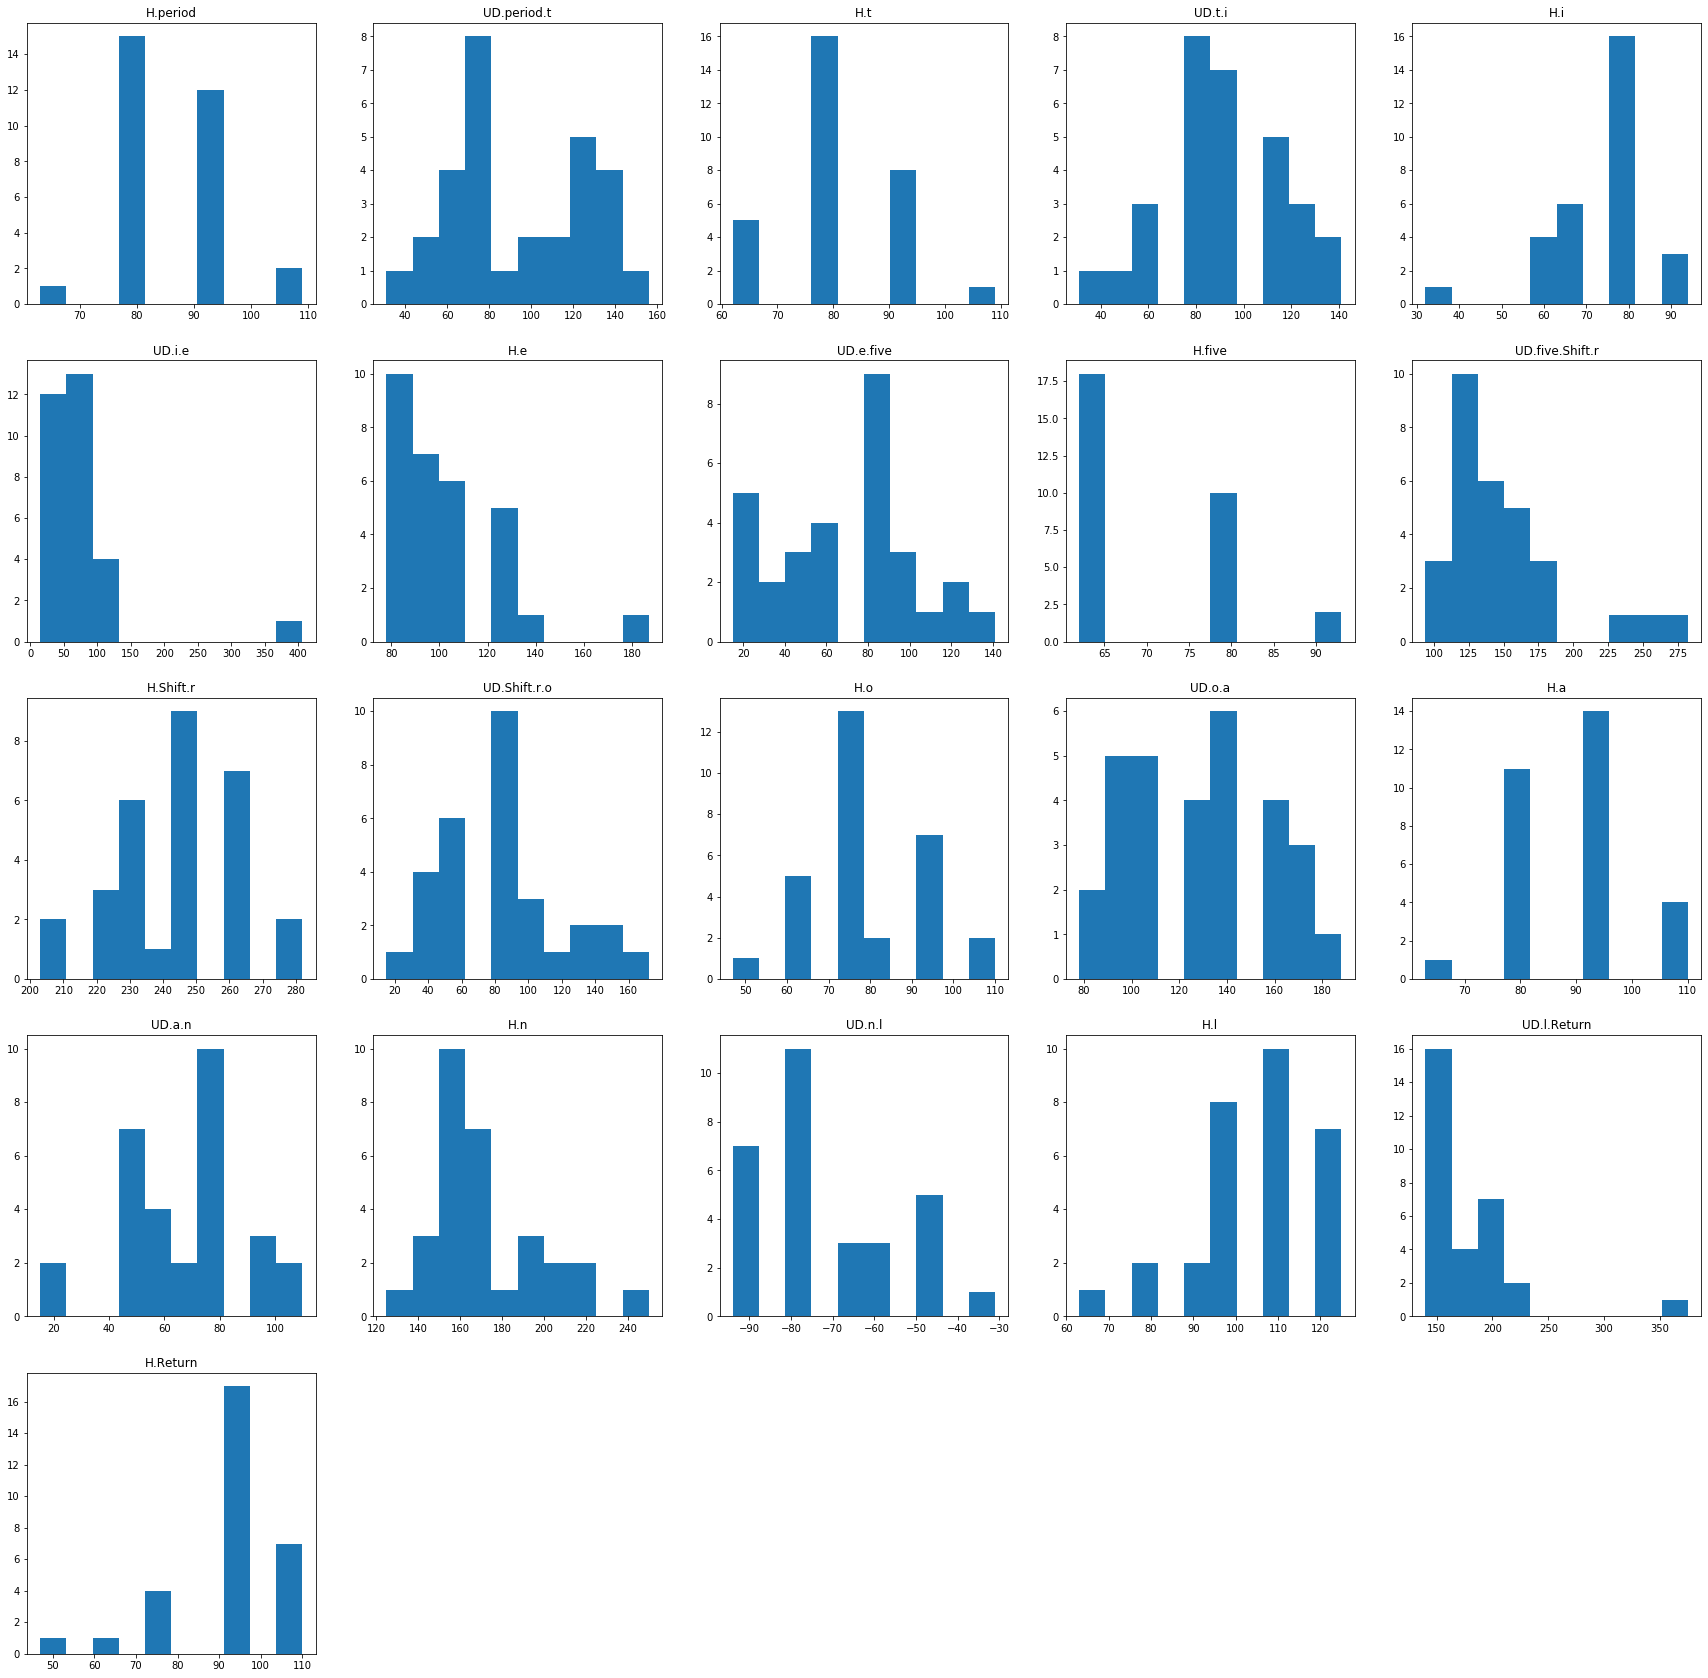

In [408]:
plt.figure(figsize=(30, 30))
c=1
for i in dfu.columns[2:]:
    plt.subplot(5, 5, c)
    plt.title(i)
    c+=1
    f = np.array(dfu[i])
    plt.hist(f)
    print("featue: {} p-value = {:.8f}".format(i, sc.kstest(f, 'norm', args=(np.mean(f), np.std(f, ddof=1)))[1]))
plt.show()

p-value почти везде > 0.05 и, так, как эти распределения имеют одинаковую природу, можно предмоложить, что они нормальны
на этого не видно. Но если была бы больше выборка, можно было бы увидеть нормальные роспределения

In [409]:
dfb=pd.read_csv("maliuk_data_bf.csv")

featue: H.period+t p-value = 0.27280979
featue: UD.period.t+t.i p-value = 0.53641464
featue: H.t+i p-value = 0.09735231
featue: UD.t.i+i.e p-value = 0.00738116
featue: H.i+e p-value = 0.38268292
featue: UD.i.e+e.five p-value = 0.03802450
featue: H.e+five p-value = 0.19070901
featue: UD.e.five+five.Shift.r p-value = 0.09967425
featue: H.five+Shift.r p-value = 0.30162871
featue: UD.five.Shift.r+Shift.r.o p-value = 0.44187061
featue: H.Shift.r+o p-value = 0.44543842
featue: UD.Shift.r.o+o.a p-value = 0.10923401
featue: H.o+a p-value = 0.65616888
featue: UD.o.a+a.n p-value = 0.72466077
featue: H.a+n p-value = 0.32689089
featue: UD.a.n+n.l p-value = 0.33700349
featue: H.n+l p-value = 0.04497182
featue: UD.n.l+l.Return p-value = 0.10764746
featue: H.l+Return p-value = 0.66598143


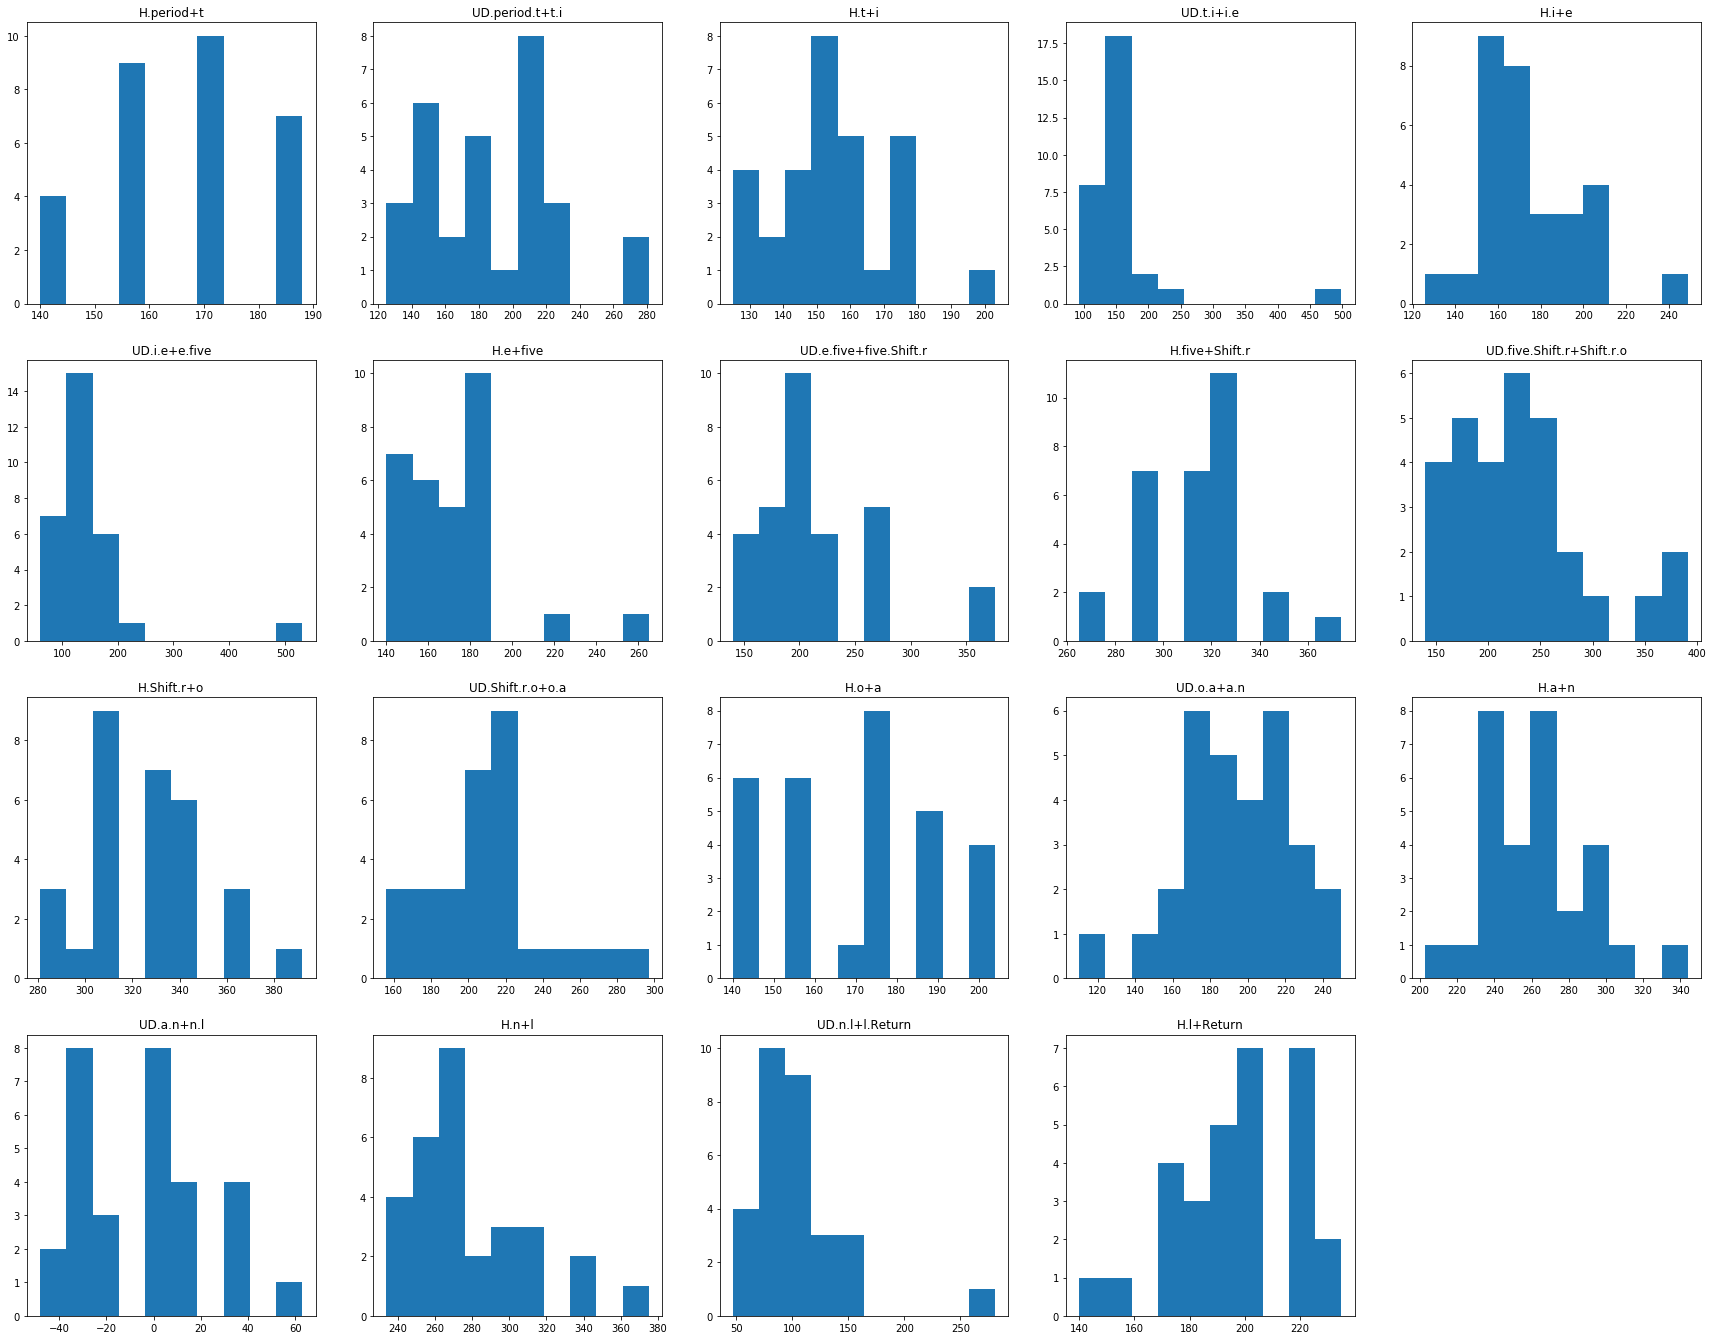

In [410]:
plt.figure(figsize=(30, 30))
c=1
for i in dfb.columns[2:]:
    plt.subplot(5, 5, c)
    plt.title(i)
    c+=1
    f = np.array(dfb[i])
    plt.hist(f)
    print("featue: {} p-value = {:.8f}".format(i, sc.kstest(f, 'norm', args=(np.mean(f), np.std(f, ddof=1)))[1]))

У bigram фичь "более нормальное" распределение. Это происходит из-за того, что из-за усреднений шумы становятся менее заметны
Скорее всего, рапределения У trigram фичь будут еще ближе к нормальным

In [411]:
dft=pd.read_csv("maliuk_data_tf.csv")

featue: H.period+t+i p-value = 0.15222100
featue: UD.period.t+t.i+i.e p-value = 0.19391352
featue: H.t+i+e p-value = 0.20258360
featue: UD.t.i+i.e+e.five p-value = 0.26978607
featue: H.i+e+five p-value = 0.16597653
featue: UD.i.e+e.five+five.Shift.r p-value = 0.21533202
featue: H.e+five+Shift.r p-value = 0.17977687
featue: UD.e.five+five.Shift.r+Shift.r.o p-value = 0.16329690
featue: H.five+Shift.r+o p-value = 0.13711465
featue: UD.five.Shift.r+Shift.r.o+o.a p-value = 0.18763061
featue: H.Shift.r+o+a p-value = 0.14329848
featue: UD.Shift.r.o+o.a+a.n p-value = 0.08054696
featue: H.o+a+n p-value = 0.12488391
featue: UD.o.a+a.n+n.l p-value = 0.11261686
featue: H.a+n+l p-value = 0.18709816
featue: UD.a.n+n.l+l.Return p-value = 0.18060404
featue: H.n+l+Return p-value = 0.18721703


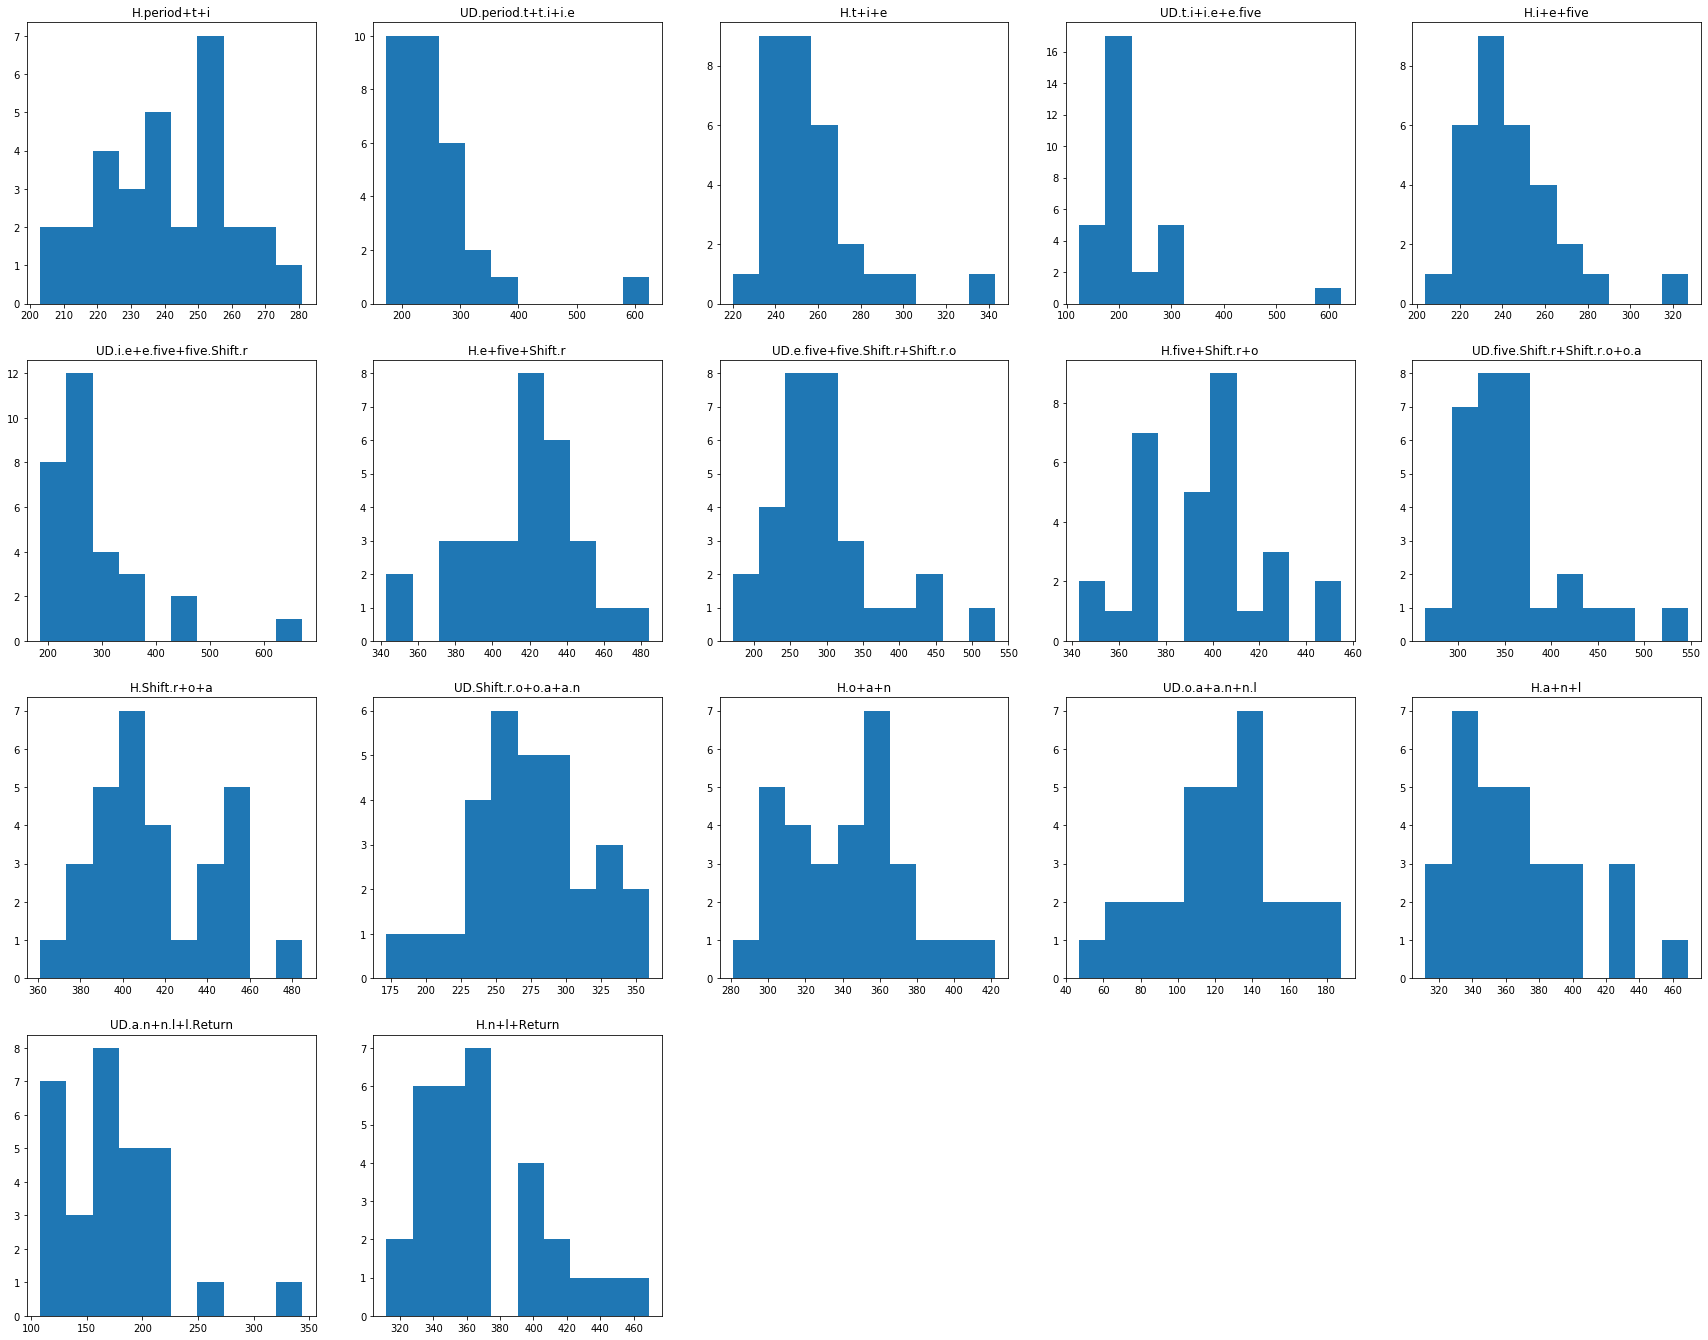

In [412]:
plt.figure(figsize=(30, 30))
c=1
for i in dft.columns[2:]:
    plt.subplot(5, 5, c)
    plt.title(i)
    c+=1
    f = np.array(dft[i])
    plt.hist(f)
    print("featue: {} p-value = {:.8f}".format(i, sc.kstest(f, 'norm', args=(np.mean(f), np.std(f, ddof=1)))[0]))

Как и ожидалось, trigram фичи оказались еще ближе к нормальному распределению. все фичи имеют p-value > 0.05
гистограммы тоже стали формой отдаленно напоминать нормальные роспределения

In [413]:
def normalize_std(X):
    res=np.mean(X, axis=0)
    stdd=np.std(X,axis=0)
    return (X-res)/stdd

In [414]:
dfdu = pd.read_csv("extracted_features_uf.csv")
dfdb = pd.read_csv("extracted_features_bf.csv")
dfdt = pd.read_csv("extracted_features_tf.csv")

unigram

In [440]:
sample = np.random.choice(np.array(dfdu.index),dfu.shape[0],replace = False)
false = dfdu.iloc[sample,:]

In [441]:
x_false=np.ones((dfu.shape[0],1), dtype="int32")
for i in false.columns[2:]:
    x_false = np.concatenate((x_false, np.array(false[i]*1000, dtype="int32").reshape(-1,1)),axis=1)
x_true=np.ones((dfu.shape[0],1), dtype="int32")
for i in false.columns[2:]:
    x_true = np.concatenate((x_true, np.array(dfu[i], dtype="int32").reshape(-1,1)),axis=1)

In [442]:
data=np.concatenate((x_false,x_true),axis=0)
data=normalize_std(data[:,1:])
x_false=np.concatenate((x_false[:,0].reshape(-1,1), data[:x_false.shape[0]]),axis=1)
x_true=np.concatenate((x_true[:,0].reshape(-1,1), data[x_false.shape[0]:]),axis=1)

In [443]:
t=np.arange(x_true.shape[0])
np.random.shuffle(t)
true_train=x_true[t[:x_true.shape[0]//2]]
true_test=x_true[t[x_true.shape[0]//2:]]
np.random.shuffle(t)
false_train=x_false[t[:x_true.shape[0]//2]]
false_test=x_false[t[x_true.shape[0]//2:]]

In [444]:
y_train=np.concatenate((np.ones((x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]//2,1),dtype="int32")),axis=0)
train=np.concatenate((np.concatenate((true_train,false_train),axis=0),y_train),axis=1)
train=np.random.permutation(train)
x_train=train[:,:-1]
y_train=train[:,-1]
y_test=np.concatenate((np.ones((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32")),axis=0)
test=np.concatenate((np.concatenate((true_test,false_test),axis=0),y_test),axis=1)
test=np.random.permutation(test)
x_testu=test[:,:-1]
y_testu=test[:,-1]

In [445]:
regu = linear_model.LogisticRegression(solver='liblinear')
regu.fit(x_train,y_train)
y_reg=regu.predict(x_testu)

In [446]:
vmu = svm.SVC(gamma='auto')
vmu.fit(x_train, y_train)
y_svm=vmu.predict(x_testu)

In [447]:
dubu = tree.DecisionTreeClassifier()
dubu.fit(x_train,y_train)
y_tree = dubu.predict(x_testu)

bigram

In [448]:
sample = np.random.choice(np.array(dfdb.index),dfb.shape[0],replace =False)
false = dfdb.iloc[sample,:]

In [449]:
x_false=np.ones((dfb.shape[0],1), dtype="int32")
for i in false.columns[2:]:
    x_false = np.concatenate((x_false, np.array(false[i]*1000, dtype="int32").reshape(-1,1)),axis=1)
x_true=np.ones((dfb.shape[0],1), dtype="int32")
for i in false.columns[2:]:
    x_true = np.concatenate((x_true, np.array(dfb[i], dtype="int32").reshape(-1,1)),axis=1)

In [450]:
t=np.arange(x_true.shape[0])
np.random.shuffle(t)
true_train=x_true[t[:x_true.shape[0]//2]]
true_test=x_true[t[x_true.shape[0]//2:]]
np.random.shuffle(t)
false_train=x_false[t[:x_true.shape[0]//2]]
false_test=x_false[t[x_true.shape[0]//2:]]

In [451]:
y_train=np.concatenate((np.ones((x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]//2,1),dtype="int32")),axis=0)
train=np.concatenate((np.concatenate((true_train,false_train),axis=0),y_train),axis=1)
train=np.random.permutation(train)
x_train=train[:,:-1]
y_train=train[:,-1]
y_test=np.concatenate((np.ones((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32")),axis=0)
test=np.concatenate((np.concatenate((true_test,false_test),axis=0),y_test),axis=1)
test=np.random.permutation(test)
x_testb=test[:,:-1]
y_testb=test[:,-1]

In [452]:
regb = linear_model.LogisticRegression(solver='liblinear')
regb.fit(x_train,y_train)
y_reg=regb.predict(x_testb)

In [453]:
vmb = svm.SVC(gamma='auto')
vmb.fit(x_train, y_train)
y_svm=vmb.predict(x_testb)

In [454]:
dubb = tree.DecisionTreeClassifier()
dubb.fit(x_train,y_train)
y_tree = dubb.predict(x_testb)

trigram

In [455]:
sample = np.random.choice(np.array(dfdt.index),dft.shape[0],replace =False)
false = dfdt.iloc[sample,:]

In [456]:
false.columns[2:]

Index(['H.period+t+i', 'UD.period.t+t.i+i.e', 'H.t+i+e', 'UD.t.i+i.e+e.five',
       'H.i+e+five', 'UD.i.e+e.five+five.Shift.r', 'H.e+five+Shift.r',
       'UD.e.five+five.Shift.r+Shift.r.o', 'H.five+Shift.r+o',
       'UD.five.Shift.r+Shift.r.o+o.a', 'H.Shift.r+o+a',
       'UD.Shift.r.o+o.a+a.n', 'H.o+a+n', 'UD.o.a+a.n+n.l', 'H.a+n+l',
       'UD.a.n+n.l+l.Return', 'H.n+l+Return'],
      dtype='object')

In [457]:
dft.columns[2:]

Index(['H.period+t+i', 'UD.period.t+t.i+i.e', 'H.t+i+e', 'UD.t.i+i.e+e.five',
       'H.i+e+five', 'UD.i.e+e.five+five.Shift.r', 'H.e+five+Shift.r',
       'UD.e.five+five.Shift.r+Shift.r.o', 'H.five+Shift.r+o',
       'UD.five.Shift.r+Shift.r.o+o.a', 'H.Shift.r+o+a',
       'UD.Shift.r.o+o.a+a.n', 'H.o+a+n', 'UD.o.a+a.n+n.l', 'H.a+n+l',
       'UD.a.n+n.l+l.Return', 'H.n+l+Return'],
      dtype='object')

In [458]:
x_false=np.ones((dft.shape[0],1), dtype="int32")
for i in false.columns[2:]:
    x_false = np.concatenate((x_false, np.array(false[i]*1000, dtype="int32").reshape(-1,1)),axis=1)
x_true=np.ones((dft.shape[0],1), dtype="int32")
for i in dft.columns[2:]:
    x_true = np.concatenate((x_true, np.array(dft[i], dtype="int32").reshape(-1,1)),axis=1)

In [459]:
t=np.arange(x_true.shape[0])
np.random.shuffle(t)
true_train=x_true[t[:x_true.shape[0]//2]]
true_test=x_true[t[x_true.shape[0]//2:]]
np.random.shuffle(t)
false_train=x_false[t[:x_true.shape[0]//2]]
false_test=x_false[t[x_true.shape[0]//2:]]

In [460]:
y_train=np.concatenate((np.ones((x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]//2,1),dtype="int32")),axis=0)
train=np.concatenate((np.concatenate((true_train,false_train),axis=0),y_train),axis=1)
train=np.random.permutation(train)
x_train=train[:,:-1]
y_train=train[:,-1]
y_test=np.concatenate((np.ones((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32"),np.zeros((x_true.shape[0]-x_true.shape[0]//2,1),dtype="int32")),axis=0)
test=np.concatenate((np.concatenate((true_test,false_test),axis=0),y_test),axis=1)
test=np.random.permutation(test)
x_testt=test[:,:-1]
y_testt=test[:,-1]

In [461]:
regt = linear_model.LogisticRegression(solver='liblinear')
regt.fit(x_train,y_train)
y_reg=regt.predict(x_testt)

In [462]:
vmt = svm.SVC(gamma='auto')
vmt.fit(x_train, y_train)
y_svm=vmt.predict(x_testt)

In [463]:
dubt = tree.DecisionTreeClassifier()
dubt.fit(x_train,y_train)
y_tree = dubt.predict(x_testt)

частоты ошибок для логистической регрессии для unigram, bigram и trigram соответственно

In [467]:
np.mean(regu.predict(x_testu) != y_testu)

0

In [471]:
np.mean(regb.predict(x_testb) != y_testb)

0.1

In [470]:
np.mean(regt.predict(x_testt) != y_testt)

0.2

для svm

In [472]:
np.mean(vmu.predict(x_testu) != y_testu)

0.0

In [473]:
np.mean(vmb.predict(x_testb) != y_testb)

0.4666666666666667

In [474]:
np.mean(vmt.predict(x_testt) != y_testt)

0.5

для дерева

In [475]:
np.mean(dubu.predict(x_testu) != y_testu)

0.0

In [476]:
np.mean(dubb.predict(x_testb) != y_testb)

0.03333333333333333

In [477]:
np.mean(dubt.predict(x_testt) != y_testt)

0.03333333333333333